## Variables in order:
<p> CRIM per capita crime rate by town.<br />ZN proportion of residential land zoned for lots over 25,000 sq.ft.<br />INDUS proportion of non-retail business acres per town.<br />CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br />NOX nitric oxides concentration (parts per 10 million).<br />RM average number of rooms per dwelling.<br />AGE proportion of owner-occupied units built prior to 1940.<br />DIS weighted distances to five Boston employment centres.<br />RAD index of accessibility to radial highways.<br />TAX full-value property-tax rate per 10,000 dollars.<br />PTRATIO pupil-teacher ratio by town.<br />B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.<br />LSTAT percent lower status of the population.<br />MEDV Median value of owner-occupied homes in 1000 dollars.</p>



In [75]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [95]:
#Load dataset
filename = ("housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filename, delim_whitespace=True, names=names)
data.columns=data.columns.str.strip() #remove white spaces from column
data= data.apply(lambda x: x.str.strip() if x.dtype == "object" else x) #remove white spaces from row


In [96]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [97]:
#Visualize the data
data.shape

(506, 14)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [99]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory data analysis

C:\Users\Duy Truong\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


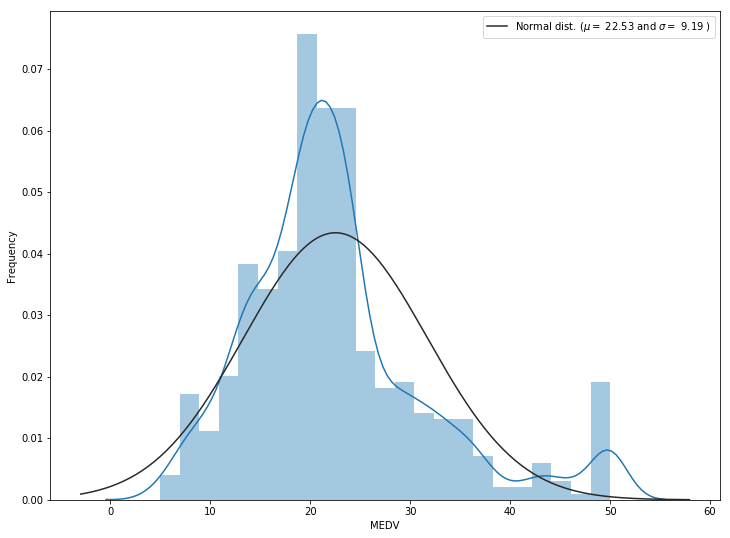

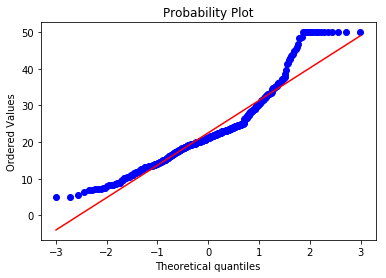

In [100]:
sns.set_style()
plt.subplots(figsize=(12,9))
sns.distplot(data['MEDV'], fit=stats.norm)
#get the mean and standard deviation
(mu, sigma) = stats.norm.fit(data['MEDV'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(data['MEDV'], plot=plt)
plt.show()


We can see that the graph for the median housing price is skewed so no need to transform the data with a log transformation.

C:\Users\Duy Truong\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


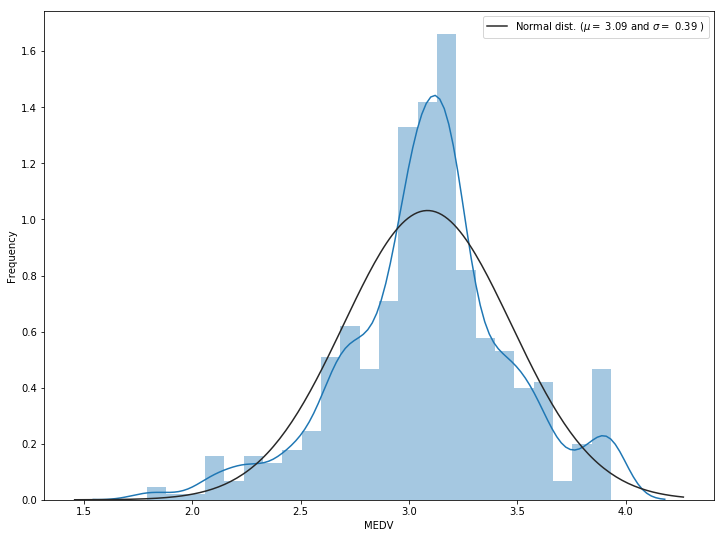

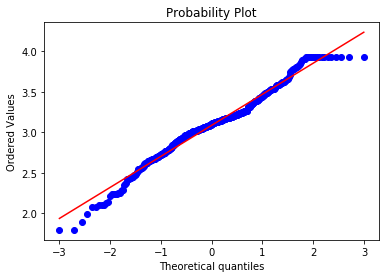

In [110]:
data['MEDV']=np.log1p(data['MEDV'])
sns.set_style()
plt.subplots(figsize=(12,9))
sns.distplot(data['MEDV'], fit=stats.norm)
#get the mean and standard deviation
(mu, sigma) = stats.norm.fit(data['MEDV'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(data['MEDV'], plot=plt)
plt.show()

In [ ]:
Now the distribution looks normal.

### Check for missing variables

In [111]:
#check if the data set has any missing values. 
data.columns[data.isnull().any()]

Index([], dtype='object')

It looks like the dataset does not contain any missing variables

### Correlation analysis

Correlation table matrix in absolute value

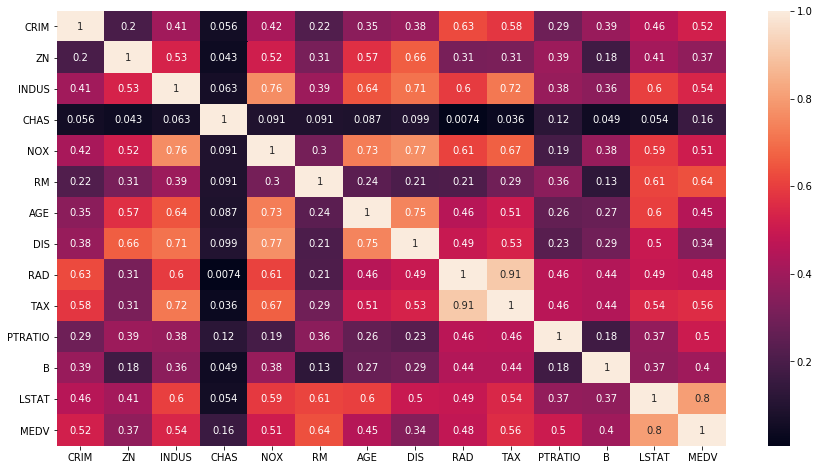

In [112]:
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr().abs(), annot=True)


Ranking the top correlated values with the target variable in absolute value term.

In [113]:
corr=data.corr().abs()
corr.sort_values(['MEDV'], ascending=False, inplace=True)
corr.MEDV

MEDV       1.000000
LSTAT      0.804294
RM         0.637387
TAX        0.558832
INDUS      0.541258
CRIM       0.520692
NOX        0.508900
PTRATIO    0.504052
RAD        0.478488
AGE        0.452150
B          0.400773
ZN         0.365136
DIS        0.339744
CHAS       0.159435
Name: MEDV, dtype: float64

To get the data ready for training, we need to transform string item to int item.


In [120]:
from sklearn.preprocessing import LabelEncoder
for column in data:
    lbl = LabelEncoder() 
    lbl.fit(list(data[column].values)) 
    data[column] = lbl.transform(list(data[column].values))

Now we can train the model.

### Model analysis

In [137]:
#split the data into training and testing
y=data['MEDV']
X=data.drop('MEDV',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


Now we can try with a random forest model.

In [148]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=600)
rfc.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Predicting test data

Text(0,0.5,'Predicted Y')

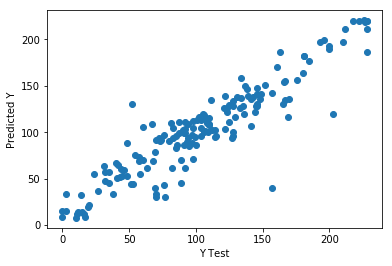

In [143]:
predictions = rfc.predict(X_test)
#scatterplot real values vs predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the model

In [144]:
# calculate the metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 15.241586826347303
MSE: 475.57910986360616
RMSE: 21.80777636219718


In [145]:
print( 'Score:', model.score(X_test, y_test))


Score: 0.7852595932527439


### Cross validation

In [155]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestRegressor(n_estimators=600)
scores = cross_val_score(rfc, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.66 (+/- 0.31)


Because cross-validation technique gives a realistic model accuracy, with given variables, we are able to correctly predict 66% of the Boston housing.